<a href="https://colab.research.google.com/github/szh141/Examples/blob/main/DBSCAN_Silhouette_GridSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c

https://medium.com/@revag2014/dbscan-an-easy-clustering-algorithm-and-also-how-to-optimize-it-using-grid-search-69a382b63e85

Silhouette Score = (b-a)/max(a,b)
(-1,1)


from sklearn.metrics import silhouette_score

print(f'Silhouette Score(n=2): {silhouette_score(Z, label)}')



Silhouette Score(n=2): 0.8141956542208645


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


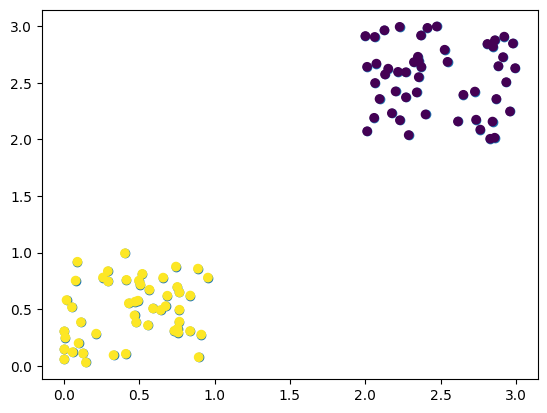

In [13]:
# evaluate goodness of the unsupervised fit

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

X= np.random.rand(50,2)
Y= 2 + np.random.rand(50,2)
Z= np.concatenate((X,Y))
Z=pd.DataFrame(Z) #converting into data frame for ease

from matplotlib import pyplot as plt
plt.scatter(Z[0],Z[1])

kmean= KMeans(n_clusters=2)
kmean.fit(Z)
label=kmean.predict(Z)

print(f'Silhouette Score(n=2): {silhouette_score(Z, label)}')
plt.scatter(Z[0],Z[1],c=label)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score(n=3): 0.5918631362222628


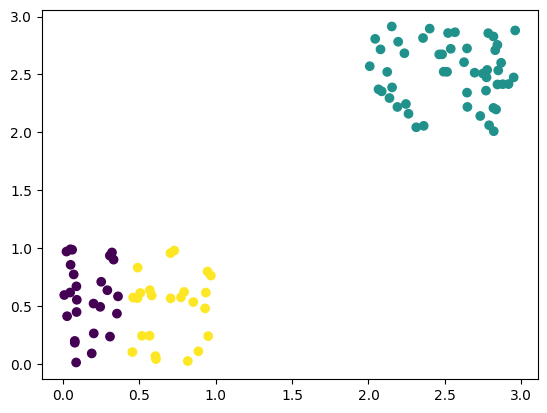

In [12]:
# try 3 clusters
KMean= KMeans(n_clusters=3)
KMean.fit(Z)
label=KMean.predict(Z)
print(f'Silhouette Score(n=3): {silhouette_score(Z, label)}')
plt.scatter(Z[0],Z[1],c=label)

DSBCAN and gridSearch

In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

def sklearn_to_df(datasets):
  df = pd.DataFrame(data.data,columns=data.feature_names)
  df['target'] = pd.Series(data.target)
  return df

df = sklearn_to_df(data)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


cannot use sklearn.model_selection.gridsearchcv
write iteration yourself

In [39]:
def dbscan_grid_search(X_data, lst, clst_count, eps_space = 0.5,
                       min_samples_space = 5, min_clust = 0, max_clust = 10):

    """
Performs a hyperparameter grid search for DBSCAN.

Parameters:
    * X_data            = data used to fit the DBSCAN instance
    * lst               = a list to store the results of the grid search
    * clst_count        = a list to store the number of non-whitespace clusters
    * eps_space         = the range values for the eps parameter
    * min_samples_space = the range values for the min_samples parameter
    * min_clust         = the minimum number of clusters required after each search iteration in order for a result to be appended to the lst
    * max_clust         = the maximum number of clusters required after each search iteration in order for a result to be appended to the lst


Example:

# Loading Libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Loading iris dataset
iris = datasets.load_iris()
X = iris.data[:, :]
y = iris.target

# Scaling X data
dbscan_scaler = StandardScaler()

dbscan_scaler.fit(X)

dbscan_X_scaled = dbscan_scaler.transform(X)

# Setting empty lists in global environment
dbscan_clusters = []
cluster_count   = []


# Inputting function parameters
dbscan_grid_search(X_data = dbscan_X_scaled,
                   lst = dbscan_clusters,
                   clst_count = cluster_count
                   eps_space = pd.np.arange(0.1, 5, 0.1),
                   min_samples_space = pd.np.arange(1, 50, 1),
                   min_clust = 3,
                   max_clust = 6)

"""

    # Importing counter to count the amount of data in each cluster
    from collections import Counter


    # Starting a tally of total iterations
    n_iterations = 0


    # Looping over each combination of hyperparameters
    for eps_val in eps_space:
        for samples_val in min_samples_space:

            dbscan_grid = DBSCAN(eps = eps_val,
                                 min_samples = samples_val)


            # fit_transform
            clusters = dbscan_grid.fit_predict(X = X_data)


            # Counting the amount of data in each cluster
            cluster_count = Counter(clusters)


            # Saving the number of clusters
            n_clusters = sum(abs(pd.np.unique(clusters))) - 1


            # Increasing the iteration tally with each run of the loop
            n_iterations += 1


            # Appending the lst each time n_clusters criteria is reached
            if n_clusters >= min_clust and n_clusters <= max_clust:

                dbscan_clusters.append([eps_val,
                                        samples_val,
                                        n_clusters])


                clst_count.append(cluster_count)

    # Printing grid search summary information
    print(f"""Search Complete. \nYour list is now of length {len(lst)}. """)
    print(f"""Hyperparameter combinations checked: {n_iterations}. \n""")